In [1]:
# data fetching
import os
import cx_Oracle

# data analysis and wrangling
import pandas as pd
import numpy as np
import csv

# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def exp_type_plot(data, x, y, exp_type, swarm = False):
    exp_type_lt = [exp_type]
    temp_df = data[data.EXP_TYPE.isin(exp_type_lt)]
    height = data[y].nunique()
    plt.figure(figsize=[12,height]) # current Axes
    ax = sns.boxplot(x = x, y = y, data=temp_df)
    sns.swarmplot(x=x, y=y, data=temp_df, color=".3") if swarm==True else None
    ax.set_title( exp_type + ' vs ' + y)
    
def exp_type_plot_bv(data, x, y, exp_type, swarm = False):
    exp_type_lt = [exp_type]
    temp_df = data[data.EXP_TYPE.isin(exp_type_lt)]
    height = data[y].nunique()*3
    
    fig, (axis1,axis2) = plt.subplots(2,1,figsize=(12,height))
    
    sns.boxplot(x = x, y = y, data=temp_df, ax = axis1)
    sns.swarmplot(x=x, y=y, data=temp_df, color=".3", ax = axis1) if swarm==True else None
    axis1.set_title(exp_type + ' vs ' + y)

    sns.violinplot(x = x, y = y, data=temp_df, split = True, ax = axis2)
#     axis2.set_title(exp_type + ' vs ' + y)

In [3]:
# os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_CHINA.UTF8'
# os.environ['NLS_LANG'] = 'SIMPLIFIED CHINESE_SINGAPORE.ZHT16GBK'
# os.environ['NLS_LANG'] = 'AMERICAN_AMERICA.WE8MSWIN1252'
os.environ['NLS_LANG'] = 'ENGLISH_UNITED KINGDOM.AL32UTF8'

sns.set_style('whitegrid',{'font.sans-serif':['Arial','Arial']})

#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 
plt.rcParams['font.size'] = 12

# Oracle client environment variable
os.putenv('ORACLE_HOME', "C:\\app\oracle\\client11g\\product\\11.2.0\\client_2")
os.putenv('LD_LIBRARY_PATH', "C:\\app\\oracle\\client11g\\product\\11.2.0\\client_2\\lib")

# connect security information

user_id = 'APAC_FIN_COMP_MART'
pass_wd = 'not_apac_fin_comp'

In [4]:
# GODW server tns
dsn_tns = cx_Oracle.makedsn('exak-scan.kau.roche.com', 15210, service_name='OTHER_GODWP.KAU.ROCHE.COM')

connection = cx_Oracle.connect(user_id, pass_wd, dsn_tns)

# General information about the YF DM_F_YF_CM_SRC table
Yellow flag table contain 726503 records for 1753

In the table, the latest report date is 2017-5-29

In [5]:
SQL = """
select count(1) as T_NUM_1753 from DM_F_YF_CM_SRC where COMPANY_CODE = '1753' and REIMBUR_AMT > 0
and EXP_TYPE is not null
and T_DATE >= To_Date ('2016-01-01', 'YYYY-MM-DD')
"""
result = pd.read_sql(SQL, con=connection)
result.head(10)

,T_NUM_1753
0,729644


In [6]:
SQL = "select min(T_DATE), max(T_DATE) from DM_F_YF_CM_SRC where COMPANY_CODE = '1753'"
result = pd.read_sql(SQL, con=connection)
result

,MIN(T_DATE),MAX(T_DATE)
0,2013-05-15,2018-01-24


In [7]:
SQL = '''
select exp_type, 
count(1) as cnt, sum(REIMBUR_AMT) as sum, avg(REIMBUR_AMT) as avg, min(REIMBUR_AMT) as min, max(REIMBUR_AMT) as max
from DM_F_YF_CM_SRC 
where 
COMPANY_CODE = '1753' -- and EXP_TYPE is not null
and REIMBUR_AMT > 0
group by exp_type having count(1) > 1
order by cnt DESC
'''
result = pd.read_sql(SQL, con=connection)
result

,EXP_TYPE,CNT,SUM,AVG,MIN,MAX
0,Taxi,195628,20099282.43,102.742360,0.49,20000.00
1,Business Meal with HCPs,157355,89116465.13,566.340219,0.01,21456.00
2,Hotel,85873,55207134.10,642.892808,0.01,30228.16
3,Train,69691,13015036.74,186.753480,0.50,27986.00
4,Lunch,33734,4528283.43,134.234998,0.02,3881.00
5,Dinner,32193,5708688.98,177.327027,0.01,9578.00
6,Mobile/Cellular Phone,32121,10345633.09,322.083157,0.05,6213.32
7,Tolls/Road Charges,25271,1228337.60,48.606608,1.00,1068.20
8,Congress (CAMAC/Sales),21170,33381170.87,1576.814873,0.03,19980.00
9,Public Transport,19633,1780910.62,90.710061,1.00,8193.84


In [8]:
SQL = '''
select 
location, 
count(1) as cnt, sum(REIMBUR_AMT) as sum, avg(REIMBUR_AMT) as avg, min(REIMBUR_AMT) as min, max(REIMBUR_AMT) as max
from DM_F_YF_CM_SRC 
where 
COMPANY_CODE = '1753' and EXP_TYPE is not null
and REIMBUR_AMT > 0 and location is not null
and T_DATE >= To_Date ('2016-01-01', 'YYYY-MM-DD')
group by location
having count(1) > 1
order by cnt DESC
'''
result = pd.read_sql(SQL, con=connection)
result

,LOCATION,CNT,SUM,AVG,MIN,MAX
0,上海,73216,23293692.79,318.150306,0.01,196800.00
1,北京,43038,16509582.83,383.604787,0.01,27986.00
2,Shanghai,38857,11961475.14,307.833213,0.01,275000.00
3,广州,35823,12848998.22,358.680128,0.03,28517.50
4,杭州,21852,7130240.38,326.296924,0.01,25000.00
5,Beijing,15246,6022534.10,395.023882,0.01,14680.00
6,成都,14035,5450670.74,388.362717,0.02,11560.00
7,武汉,12547,4765388.00,379.802981,0.01,10056.00
8,西安,11587,4181236.93,360.855867,0.01,7979.00
9,Guangzhou,11319,3747791.14,331.106205,0.01,6872.00


# Division

In [9]:
SQL = """
Select 
EMP.DIVISION, count(YF.REIMBUR_AMT) as CNT
, sum(YF.REIMBUR_AMT) as sum, avg(YF.REIMBUR_AMT) as avg, min(YF.REIMBUR_AMT) as min, max(YF.REIMBUR_AMT) as max

  from APAC_FIN_COMP_MART.dm_f_yf_cm_src YF, 
        APAC_FIN_COMP_MART.dm_d_employee EMP,
        APAC_CONCUR_CORE.co_int_user INT_EMP
  where YF.EMPLOYEE_ID = INT_EMP.persistantpersid and INT_EMP.USERID = EMP.AD
    and EXP_TYPE is not null and EXP_TYPE <> 'Undefined' 
    and YF.COMPANY_CODE = '1753'   
    and YF.REIMBUR_AMT > 0
    and T_DATE >= To_Date ('2016-01-01', 'YYYY-MM-DD')
--   and EMP.DIVISION like 'BUO%'
    group by EMP.DIVISION
    order by CNT DESC
"""
Result = pd.read_sql(SQL, con=connection)
Result


,DIVISION,CNT,SUM,AVG,MIN,MAX
0,BUO1,178046,62773880.72,352.571137,0.01,34082.00
1,BU AnS,169425,63546946.10,375.074199,0.01,100000.00
2,BUO2,152331,59823707.60,392.721820,0.01,275000.00
3,CAMAC,51398,15198053.49,295.693480,0.01,20000.00
4,Medical,46397,14931491.34,321.820190,0.01,32550.00
5,Technical,22623,5800354.76,256.391936,0.02,196800.00
6,Space,8611,2216959.78,257.456716,2.00,100000.00
7,Finance,7594,2139809.66,281.776358,0.01,20520.14
8,BU1,7241,2770450.72,382.606093,2.00,19560.00
9,BU2,4499,1268327.20,281.913136,2.00,6292.00


# General information about the CO_EXPENSE_ENTRY table

In [10]:
SQL = '''
select count(1) as T_NUM_1753 from APAC_CONCUR_CORE.co_expense_entry 
where COMPANY_CODE = '1753' and REIMBUR_AMT > 0 and T_DATE >= To_Date ('2017-01-01', 'YYYY-MM-DD')
'''
result = pd.read_sql(SQL, con=connection)
result.head(10)

,T_NUM_1753
0,763376


In [11]:
SQL = '''
select min(T_DATE), max(T_DATE) from APAC_CONCUR_CORE.co_expense_entry 
where COMPANY_CODE = '1753' and T_DATE >= To_Date ('2017-01-01', 'YYYY-MM-DD')
'''
result = pd.read_sql(SQL, con=connection)
result

,MIN(T_DATE),MAX(T_DATE)
0,2017-01-01,2021-04-22


In [12]:
SQL = '''
select exp_type, 
count(1) as cnt, sum(REIMBUR_AMT) as sum, avg(REIMBUR_AMT) as avg, min(REIMBUR_AMT) as min, max(REIMBUR_AMT) as max
from APAC_CONCUR_CORE.co_expense_entry 
where 
COMPANY_CODE = '1753' 
and EXP_TYPE is not null and EXP_TYPE <> 'Undefined' 
and T_DATE >= To_Date ('2017-01-01', 'YYYY-MM-DD')
and REIMBUR_AMT > 0
group by exp_type having count(1) > 1
order by cnt DESC
'''
result = pd.read_sql(SQL, con=connection)
result

,EXP_TYPE,CNT,SUM,AVG,MIN,MAX
0,Taxi,209181,20344367.66,97.257244,0.01,20000.00
1,Business Meal with HCPs,165461,95160059.74,575.120782,0.01,21456.00
2,Hotel,89335,58171020.23,651.155988,0.01,31655.12
3,Train,69535,12544325.48,180.403041,0.50,27986.00
4,Mobile/Cellular Phone,36883,11558985.82,313.396031,0.05,6213.32
5,Lunch,32626,4267608.36,130.803910,0.19,4741.00
6,Dinner,30924,5384859.24,174.132041,0.01,9578.00
7,Tolls/Road Charges,25658,1239074.13,48.291922,1.00,2700.00
8,Public Transport,23272,1946841.17,83.655946,1.00,6197.00
9,Congress (CAMAC/Sales),19727,31860164.10,1615.053688,0.03,19980.00


# Location 
* To be translated in English

In [13]:
SQL = '''
select 
location, 
count(1) as cnt, sum(REIMBUR_AMT) as sum, avg(REIMBUR_AMT) as avg, min(REIMBUR_AMT) as min, max(REIMBUR_AMT) as max
from APAC_CONCUR_CORE.co_expense_entry 
where 
COMPANY_CODE = '1753' 
and EXP_TYPE is not null and EXP_TYPE <> 'Undefined' 
and REIMBUR_AMT > 0 and location is not null
and T_DATE >= To_Date ('2017-01-01', 'YYYY-MM-DD')
group by location having count(1) > 1
order by cnt DESC
'''
result = pd.read_sql(SQL, con=connection)
result

,LOCATION,CNT,SUM,AVG,MIN,MAX
0,上海,84609,24654622.86,291.394803,0.01,196800.00
1,Shanghai,45680,13251553.82,290.095311,0.01,275000.00
2,北京,43367,16629127.29,383.451179,0.01,27986.00
3,广州,35691,12925335.57,362.145515,0.01,28517.50
4,杭州,21193,6853475.07,323.383904,0.01,25000.00
5,Beijing,16058,6241122.84,388.661280,0.01,14680.00
6,成都,15120,5726592.06,378.742861,0.02,11560.00
7,武汉,13527,5216116.80,385.607807,0.01,10056.00
8,西安,12672,4577707.96,361.245893,0.01,7979.00
9,Guangzhou,12012,4180486.82,348.025876,0.01,7747.00


In [14]:
SQL = """
Select 
EMP.DIVISION, count(EXP.REIMBUR_AMT) as CNT
, sum(EXP.REIMBUR_AMT) as sum, avg(EXP.REIMBUR_AMT) as avg, min(EXP.REIMBUR_AMT) as min, max(EXP.REIMBUR_AMT) as max

  from APAC_CONCUR_CORE.co_expense_entry EXP, 
        APAC_FIN_COMP_MART.dm_d_employee EMP,
        APAC_CONCUR_CORE.co_int_user INT_EMP
  where EXP.EMPLOYEE_ID = INT_EMP.persistantpersid and INT_EMP.USERID = EMP.AD
    and EXP.EXP_TYPE is not null and EXP.EXP_TYPE <> 'Undefined' 
    and EXP.COMPANY_CODE = '1753'   
    and EXP.REIMBUR_AMT > 0
    and EXP.T_DATE >= To_Date('2017-01-01', 'YYYY-MM-DD')
--   and EMP.DIVISION like 'BUO%'
    group by EMP.DIVISION
    order by CNT DESC
"""
Result = pd.read_sql(SQL, con=connection)
Result

,DIVISION,CNT,SUM,AVG,MIN,MAX
0,BU AnS,179214,67477022.25,376.516468,0.01,100000.00
1,BUO1,164639,57727119.11,350.628461,0.01,34082.00
2,BUO2,150218,59680956.22,397.295638,0.01,275000.00
3,CAMAC,51566,14941251.03,289.750049,0.01,24000.00
4,Medical,46433,14774444.06,318.188445,0.01,49999.84
5,Technical,31458,7578902.89,240.921320,0.01,196800.00
6,Space,10383,2577694.61,248.261062,2.00,100000.00
7,Finance,9426,2883349.90,305.893263,0.01,63980.00
8,BU1,7325,2709550.72,369.904535,2.00,19560.00
9,HR,5486,1707871.16,311.314466,0.01,17790.16


# Understand the Division : 'BUO1', 'BU1'

Now we use co_expense_entry, instead of yellow flag table. To have a better performance, we will use the claim of BUO1 and BU1 in 2017.

## Extract Data from CO_EXPENSE_ENTRY

In [15]:
SQL = """
Select 
    EXP.EXP_TYPE, EXP.EMPLOYEE_NAME, EXP.EMPLOYEE_COUNTRY_CODE, EXP.RPT_NAME, EXP.COMPANY_NAME, 
    EXP.RPT_COUNTRY_CODE, EXP.COMPANY_CODE, EXP.RPT_CC_CODE, EXP.RPT_LEGACY_KEY, 
    EXP.FIRST_SUBMITTED_DATE, EXP.LAST_SUBMITTED_DATE, EXP.IS_SENT_BACK, EXP.PURPOSE,
    EXP.SENT_BACK_CODE, EXP.SENT_BACK_TEXT, EXP.APPROVAL_STATUS, EXP.PAYMENT_DATE, 
    EXP.TRANSACTION_NO, EXP.ORG_5_NAME, EXP.ORG_5_CODE, EXP.T_DATE, EXP.PAYMENT_TYPE, 
    EXP.VENDOR, EXP.LOCATION, EXP.T_CURRENCY, EXP.T_AMT, EXP.RATE, EXP.REIMBUR_CURRENCY,
    EXP.REIMBUR_AMT, EXP.CLAIMED_AMT, EXP.APPROVED_AMT, EXP.REPORT_DATE, 
    EMP.E_NAME, EMP.AD, EMP.EMPLOYEE_ID, EMP.SEX, EMP.LOCAL_NAME, EMP.PIN_YIN, 
    EMP.M_POSITION, EMP.EMPLOYMENT_DATE, EMP.IT_DEPARTMENT, EMP.COST_CENTER, 
    EMP.CITY, EMP.BRANCH, EMP.COUNTRY_CODE, EMP.DIVISION,
    INT_EMP.USERID, INT_EMP.LASTNAME, INT_EMP.FIRSTNAME, INT_EMP.PERSISTANTPERSID, 
    INT_EMP.LOCALEMPLOYEEID, INT_EMP.EMPLOYEECATEROGRY, INT_EMP.LOCATION as EMP_LOCATION, 
    INT_EMP.COUNTRYTXT, INT_EMP.AD_DOMAIN, INT_EMP.AD_ADMINUNIT, INT_EMP.LM_USERID, 
    INT_EMP.LM_LASTNAME, INT_EMP.LM_FIRSTNAME, INT_EMP.LM_PERSISTANTPERSID, 
    INT_EMP.LM_LOCALEMPLOYEEID, INT_EMP.LM_GLOBALCOSTCENTERCD
  from APAC_CONCUR_CORE.co_expense_entry EXP, 
        APAC_FIN_COMP_MART.dm_d_employee EMP,
        APAC_CONCUR_CORE.co_int_user INT_EMP
  where EXP.EMPLOYEE_ID = INT_EMP.persistantpersid and INT_EMP.USERID = EMP.AD
    and EXP.COMPANY_CODE = '1753'
    and EXP_TYPE is not null and EXP_TYPE <> 'Undefined' 
    and T_DATE >= To_Date ('2017-01-01', 'YYYY-MM-DD')
    and EXP.REIMBUR_AMT > 0 and EMP.DIVISION in ('BU1', 'BUO1')
"""

# co_expense_entry_df = pd.read_sql(SQL, con=connection)
# co_expense_entry_df.head()

# Read Data
location_file = './Data/co_expense_entry_1753_2017_BU_ANS.xlsx'
# location_file = './Data/co_expense_entry_1753_2017_BU1_BUO1.xlsx'
co_expense_entry_df = pd.read_excel(location_file, sheetname="Sheet1")

In [16]:
co_expense_entry_df.head()

,EXP_TYPE,EMPLOYEE_NAME,EMPLOYEE_COUNTRY_CODE,RPT_NAME,COMPANY_NAME,RPT_COUNTRY_CODE,COMPANY_CODE,RPT_CC_CODE,RPT_LEGACY_KEY,FIRST_SUBMITTED_DATE,...,EMP_LOCATION,COUNTRYTXT,AD_DOMAIN,AD_ADMINUNIT,LM_USERID,LM_LASTNAME,LM_FIRSTNAME,LM_PERSISTANTPERSID,LM_LOCALEMPLOYEEID,LM_GLOBALCOSTCENTERCD
0,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,TIANJIN (TIA),China,ASIA,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20
1,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,TIANJIN (TIA),China,ASIA,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20
2,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,TIANJIN (TIA),China,ASIA,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20
3,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,TIANJIN (TIA),China,ASIA,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20
4,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,TIANJIN (TIA),China,ASIA,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20


In [17]:
# location master file
location_file = './Data/city.xls'
location_df = pd.read_excel(location_file, sheetname="city")
location_df = location_df[['CITY_NAME_ST', 'CITY_NAME_EN', 'CITY_TIER']]
location_df.head(10)

,CITY_NAME_ST,CITY_NAME_EN,CITY_TIER
0,那曲,NAQU,LOW TIER
1,拉萨,LASA,LOW TIER
2,山南,SHANNAN,LOW TIER
3,日喀则,RIKAZE,LOW TIER
4,林芝,LINZHI,LOW TIER
5,阿里,ALI,LOW TIER
6,昌都,CHANGDU,LOW TIER
7,派罗欣东区其他城,PEG E OTHER CITY,OTHERS
8,派罗欣北区其他城,PEG N OTHER CITY,OTHERS
9,中卫,ZHONGWEI,LOW TIER


# Data Transforming

## Row Data:

* DM_F_YF_CM_SRC_DF
    * table DM_F_YF_CM_SRC, the yellow flag table
* co_expense_entry_df
    * table co_expense_entry, the concur claim entry table.
* location_df
    * Excel file for location master data, like chinese & english name

## To be build:

* yf_df
    * based on DM_F_YF_CM_SRC_DF join with master data: location. 
* co_df
    * based on co_expense_entry_df join with master data: location. 



In [31]:
# Translate CHINESE to English for CITY

co_df = co_expense_entry_df

co_df = co_df.join(location_df.set_index('CITY_NAME_ST'), on='LOCATION')

co_df[['LOCATION', 'CITY_NAME_EN']]

# co_df[['LOCATION', 'CITY_NAME_EN']].fillna(0).apply(lambda x: x['CITY_NAME_EN']==0 , axis=1)

co_df['LOCATION_EN'] = co_df[['LOCATION', 'CITY_NAME_EN']].fillna(0).apply(lambda x:
     str(x['LOCATION']).upper() if x['CITY_NAME_EN'] == 0 else x["CITY_NAME_EN"], axis=1)

co_df.head()
      


,EXP_TYPE,EMPLOYEE_NAME,EMPLOYEE_COUNTRY_CODE,RPT_NAME,COMPANY_NAME,RPT_COUNTRY_CODE,COMPANY_CODE,RPT_CC_CODE,RPT_LEGACY_KEY,FIRST_SUBMITTED_DATE,...,AD_ADMINUNIT,LM_USERID,LM_LASTNAME,LM_FIRSTNAME,LM_PERSISTANTPERSID,LM_LOCALEMPLOYEEID,LM_GLOBALCOSTCENTERCD,CITY_NAME_EN,CITY_TIER,LOCATION_EN
0,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20,TIANJIN,TIER IIA,TIANJIN
1,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20,TIANJIN,TIER IIA,TIANJIN
2,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20,TIANJIN,TIER IIA,TIANJIN
3,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20,TIANJIN,TIER IIA,TIANJIN
4,Business Meal with HCPs,"Liu (刘), Yanhui (艳慧)",APAC,5月上LYH,Roche Pharma Shanghai,CN,1753,1141032N20,123583,2017-06-03,...,Shanghai - IT,LUD,Lu,Dongmei,290773,10036273,1141032N20,TIANJIN,TIER IIA,TIANJIN


In [19]:
co_df.columns

Index(['EXP_TYPE', 'EMPLOYEE_NAME', 'EMPLOYEE_COUNTRY_CODE', 'RPT_NAME',
       'COMPANY_NAME', 'RPT_COUNTRY_CODE', 'COMPANY_CODE', 'RPT_CC_CODE',
       'RPT_LEGACY_KEY', 'FIRST_SUBMITTED_DATE', 'LAST_SUBMITTED_DATE',
       'IS_SENT_BACK', 'PURPOSE', 'SENT_BACK_CODE', 'SENT_BACK_TEXT',
       'APPROVAL_STATUS', 'PAYMENT_DATE', 'TRANSACTION_NO', 'ORG_5_NAME',
       'ORG_5_CODE', 'T_DATE', 'PAYMENT_TYPE', 'VENDOR', 'LOCATION',
       'T_CURRENCY', 'T_AMT', 'RATE', 'REIMBUR_CURRENCY', 'REIMBUR_AMT',
       'CLAIMED_AMT', 'APPROVED_AMT', 'REPORT_DATE', 'E_NAME', 'AD',
       'EMPLOYEE_ID', 'SEX', 'LOCAL_NAME', 'PIN_YIN', 'M_POSITION',
       'EMPLOYMENT_DATE', 'IT_DEPARTMENT', 'COST_CENTER', 'CITY', 'BRANCH',
       'COUNTRY_CODE', 'DIVISION', 'USERID', 'LASTNAME', 'FIRSTNAME',
       'PERSISTANTPERSID', 'LOCALEMPLOYEEID', 'EMPLOYEECATEROGRY',
       'EMP_LOCATION', 'COUNTRYTXT', 'AD_DOMAIN', 'AD_ADMINUNIT', 'LM_USERID',
       'LM_LASTNAME', 'LM_FIRSTNAME', 'LM_PERSISTANTPERSID',
     

# Data Understanding

## Understand EXP_TYPE on DIVISION

In [20]:
co_df[['EXP_TYPE' ,'DIVISION',  'REIMBUR_AMT']].groupby(["EXP_TYPE", 'DIVISION']).describe()

REIMBUR_AMT                \
                                                count          mean   
EXP_TYPE                         DIVISION                             
Airfare                          BU AnS          11.0    978.454545   
Bank Fees                        BU AnS          67.0     86.581791   
Breakfast                        BU AnS        1424.0     57.815323   
Business Meal with HCPs          BU AnS       55256.0    555.350080   
Business Meals (Attendees)       BU AnS          41.0    231.087317   
Congress (CAMAC/Sales)           BU AnS        6515.0   1721.130021   
Congress (Commercial)            BU AnS        1728.0    279.413108   
Congress (Medical)               BU AnS         143.0    146.696014   
Courier/Shipping/Freight         BU AnS           1.0      4.000000   
Dinner                           BU AnS        5825.0    157.050994   
Entertainment - Staff            BU AnS        2234.0    671.303250   
Gifts - Staff                    BU AnS          83.0    895.748193   
Hotel                            BU AnS       22184.0    548.000560   
Individual Meals                 BU AnS        3171.0    507.194402   
Internet/Online Fees             BU AnS          60.0    165.570333   
Laundry                          BU AnS         156.0    149.948526   
Lunch                            BU AnS        7635.0    127.159878   
Medical                          BU AnS          64.0    261.989844   
Meeting Logistics (HCP)          BU AnS           3.0     79.633333   
Mobile/Cellular Phone            BU AnS        8697.0    316.191880   
Newspapers/Magazines/Books       BU AnS           2.0    428.550000   
Office Equipment/Hardware        BU AnS           2.0    152.000000   
Office Supplies/Software         BU AnS           2.0    280.000000   
Other Employee Benefit           BU AnS          18.0    683.411111   
Outside Services/Vendors         BU AnS           1.0    132.460000   
Parking                          BU AnS          97.0     85.705979   
Passports/Visa Fees              BU AnS          18.0    499.816111   
Postage                          BU AnS        2374.0     33.606361   
Printing/Photocopying/Stationery BU AnS          70.0    168.406286   
Professional Subscriptions/Dues  BU AnS           9.0   2895.591111   
Public Transport                 BU AnS        6825.0     76.253918   
Relocation Expenses              BU AnS          13.0  21153.846154   
Seminar/Course Fees              BU AnS           2.0   7158.805000   
Taxi                             BU AnS       41334.0     98.456401   
Telephone/Fax                    BU AnS         295.0    295.658203   
Tolls/Road Charges               BU AnS        7849.0     45.240032   
Train                            BU AnS       17720.0    174.455960   
Tuition/Training Reimbursement   BU AnS           5.0  20106.152000   

                                                                              \
                                                    std      min         25%   
EXP_TYPE                         DIVISION                                      
Airfare                          BU AnS      335.973619   380.00    825.0000   
Bank Fees                        BU AnS      144.928068     6.50     25.7000   
Breakfast                        BU AnS       47.051270     0.02     31.0000   
Business Meal with HCPs          BU AnS      674.415886     0.01    148.0000   
Business Meals (Attendees)       BU AnS      159.981077     1.00    121.0000   
Congress (CAMAC/Sales)           BU AnS     1652.586340     0.03    208.4000   
Congress (Commercial)            BU AnS      792.632162     1.00     55.5600   
Congress (Medical)               BU AnS      134.442425     8.00     49.9200   
Courier/Shipping/Freight         BU AnS             NaN     4.00      4.0000   
Dinner                           BU AnS      168.923325     0.30     65.0000   
Entertainment - Staff            BU AnS     1209.216688     0.01    188.0000   
Gifts - St

In [21]:
Result = co_df[['EXP_TYPE','REIMBUR_AMT']].groupby(['EXP_TYPE'], as_index=True).describe()
Result

REIMBUR_AMT                              \
                                       count          mean           std   
EXP_TYPE                                                                   
Airfare                                 11.0    978.454545    335.973619   
Bank Fees                               67.0     86.581791    144.928068   
Breakfast                             1424.0     57.815323     47.051270   
Business Meal with HCPs              55256.0    555.350080    674.415886   
Business Meals (Attendees)              41.0    231.087317    159.981077   
Congress (CAMAC/Sales)                6515.0   1721.130021   1652.586340   
Congress (Commercial)                 1728.0    279.413108    792.632162   
Congress (Medical)                     143.0    146.696014    134.442425   
Courier/Shipping/Freight                 1.0      4.000000           NaN   
Dinner                                5825.0    157.050994    168.923325   
Entertainment - Staff                 2234.0    671.303250   1209.216688   
Gifts - Staff                           83.0    895.748193   1106.134178   
Hotel                                22184.0    548.000560    425.930266   
Individual Meals                      3171.0    507.194402    692.503189   
Internet/Online Fees                    60.0    165.570333     52.452573   
Laundry                                156.0    149.948526    286.226984   
Lunch                                 7635.0    127.159878    128.326729   
Medical                                 64.0    261.989844     81.884338   
Meeting Logistics (HCP)                  3.0     79.633333     12.851978   
Mobile/Cellular Phone                 8697.0    316.191880    145.199568   
Newspapers/Magazines/Books               2.0    428.550000    295.075660   
Office Equipment/Hardware                2.0    152.000000    207.889394   
Office Supplies/Software                 2.0    280.000000     97.580736   
Other Employee Benefit                  18.0    683.411111    295.110958   
Outside Services/Vendors                 1.0    132.460000           NaN   
Parking                                 97.0     85.705979    271.522078   
Passports/Visa Fees                     18.0    499.816111    440.331532   
Postage                               2374.0     33.606361     40.592937   
Printing/Photocopying/Stationery        70.0    168.406286    129.839484   
Professional Subscriptions/Dues          9.0   2895.591111   3271.778194   
Public Transport                      6825.0     76.253918     97.243439   
Relocation Expenses                     13.0  21153.846154   8697.184926   
Seminar/Course Fees                      2.0   7158.805000    167.492383   
Taxi                                 41334.0     98.456401    189.938660   
Telephone/Fax                          295.0    295.658203    271.916853   
Tolls/Road Charges                    7849.0     45.240032     42.892135   
Train                                17720.0    174.455960    204.765513   
Tuition/Training Reimbursement           5.0  20106.152000  44662.018778   

                                                                              \
                                      min         25%        50%         75%   
EXP_TYPE                                                                       
Airfare                            380.00    825.0000    970.000   1100.0000   
Bank Fees                            6.50     25.7000     50.000     89.4500   
Breakfast                            0.02     31.0000     45.000     68.0000   
Business Meal with HCPs              0.01    148.0000    278.000    701.0000   
Business Meals (Attendees)           1.00    121.0000    211.960    356.5000   
Congress (CAMAC/Sales)               0.03    208.4000   1402.000   2744.5000   
Congress (Commercial)                1.00     55.5600    103.010    191.5600   
Congress (Medical)                   8.00     49.9200     92.090    213.2500   
Courier/Shipping/Freight            

In [22]:
exp_type_list = Result['REIMBUR_AMT'][Result['REIMBUR_AMT']['count']>100].index.tolist()
exp_type_list

['Breakfast',
 'Business Meal with HCPs',
 'Congress (CAMAC/Sales)',
 'Congress (Commercial)',
 'Congress (Medical)',
 'Dinner',
 'Entertainment - Staff',
 'Hotel',
 'Individual Meals',
 'Laundry',
 'Lunch',
 'Mobile/Cellular Phone',
 'Postage',
 'Public Transport',
 'Taxi',
 'Telephone/Fax',
 'Tolls/Road Charges',
 'Train']

In [23]:
Result = co_df[['M_POSITION','DIVISION','REIMBUR_AMT']].groupby(['DIVISION', 'M_POSITION'], as_index=True).describe()
Result

REIMBUR_AMT               \
                                                        count         mean   
DIVISION M_POSITION                                                          
BU AnS   2018 Campus Intern/2018校招实习生                   342.0    32.736082   
         Assistant - Sales Administration/助理 - 销售       114.0   124.573596   
         Assistant to BD Director/助理 - 业务拓展销售行政          33.0   133.818182   
         Assistant to Sales Director/销售总监助理              28.0   129.140714   
         Assistant/助理                                    29.0    94.152069   
         Associate - Marketing Administration/专员         67.0   232.522537   
         Associate - Sales Administration/专员 - 销售        55.0   319.250364   
         Associate District Sales Manager/副地区销售经理     13191.0   402.104301   
         Associate Marketing Director/市场副总监            1393.0   438.190402   
         Associate Product Manager/副产品经理                582.0   294.186460   
         Associate Regional Product Manager/副区域产品      2771.0   294.640108   
         Associate Regional Sales Manager/副大区销售经理       360.0   392.968333   
         Associate Sales Director/销售副总监                2867.0   448.701291   
         BD Associate District Manager/业务拓展副地区经理       1287.0   590.575936   
         BD Associate District Manager/业务拓展副地区销售经       737.0   534.698684   
         BD Associate Regional Product Manager/业务       328.0   291.985305   
         BD Associate Sales Director/业务拓展销售副总监          205.0   575.177171   
         BD District Sales Manager/业务拓展地区经理            1701.0   402.760723   
         BD Marketing Manager/业务拓展市场部经理                 180.0   236.117389   
         BD Medical Information Consultant/业务拓展医药      7990.0   309.491688   
         BD Medical Information Executive/业务拓展医药信       246.0   595.196423   
         BD Medical Information Specialist/业务拓展医药      1583.0   280.506109   
         BD Regional Manager/业务拓展大区销售经理                 283.0   606.316396   
         BD Regional Product Specialist/业务拓展区域产品专       262.0   487.973168   
         BD Senior District Manager/业务拓展高级地区经理          401.0   194.922294   
         BD Senior Medical Information Consultant      3140.0   272.529981   
         Business Excellence Director/业务优化总监            197.0   581.209949   
         Business Operation Specialist/业务运营专员            23.0   290.995652   
         Director - Market Development/总监 - 市场拓展        304.0   381.078947   
         District Sales Manager/地区销售经理                 8085.0   428.128604   
...                                                       ...          ...   
         Marketing Director/市场总监                        994.0  1013.587978   
         Marketing Manager/市场经理                         744.0   408.688508   
         Medical Information Consultant/医药信息顾问        41556.0   320.584297   
         Medical Information Executive/医药信息主任          5754.0   440.324286   
         Medical Information Specialist/医药信息专员        28359.0   357.780793   
         Officer - Market Administration/主任 - 市场行        26.0   145.375000   
         Officer - Marketing Administration/主任 -         72.0   143.583333   
         Officer - Marketing Administration/主任 -市        46.0   121.916739   
         Officer - Sales Administration/主任 - 销售行政        26.0   158.526154   
         Product Manager                                317.0   321.777098   
         Product Manager/产品经理                           759.0   389.201989   
         Project Manager - Business Excellence           17.0    83.846471   
         Project Manager/项目经理                           148.0   289.908311   
         Regional Marketing Leader/Regional Marke       231.0   327.205411   
         Regional Marketing Leader/区域市场负责人              862.0   571.779362   
         Regional Product Manager/区域产品经理               2507.0   276.243024   
         Regional Product Specialist/区域产品主任             327.0   244.183211   
         Regional Sales Manager/大区销售经理                 4503.0   486.3784

In [24]:
m_position_list = Result['REIMBUR_AMT'][Result['REIMBUR_AMT']['count']>10000].index.tolist()
m_position_list

[('BU AnS', 'Associate District Sales Manager/副地区销售经理'),
 ('BU AnS', 'Medical Information Consultant/医药信息顾问'),
 ('BU AnS', 'Medical Information Specialist/医药信息专员'),
 ('BU AnS', 'Senior Medical Information Consultant/高级')]

In [25]:
# Result[Result.index.map(lambda x: x[0]=='ADGS').tolist()]
# Result[Result.index.map(lambda x: x[0].startswith('BUO1')).tolist()].index.tolist()

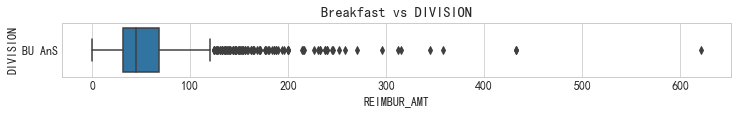

In [26]:
exp_type_plot(exp_type='Breakfast', x='REIMBUR_AMT', y='DIVISION', data=co_df)

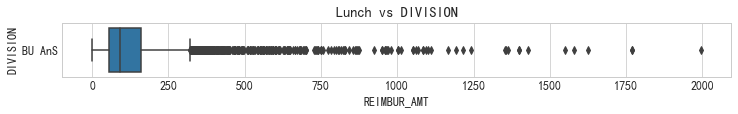

In [27]:
exp_type_plot(exp_type='Lunch', x='REIMBUR_AMT', y='DIVISION', data=co_df, swarm=False)

## Reason:
    1) Multiple people.
        * how to figure out the number of people or "Single/Multiple"

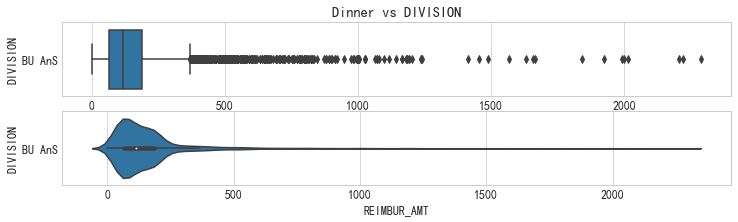

In [28]:
# exp_type_plot(exp_type='Dinner', x='REIMBUR_AMT', y='DIVISION', data=yf_df[yf_df.REIMBUR_AMT>0], swarm=False)
exp_type_plot_bv(exp_type='Dinner', x='REIMBUR_AMT', y='DIVISION', data=co_df, swarm=False)

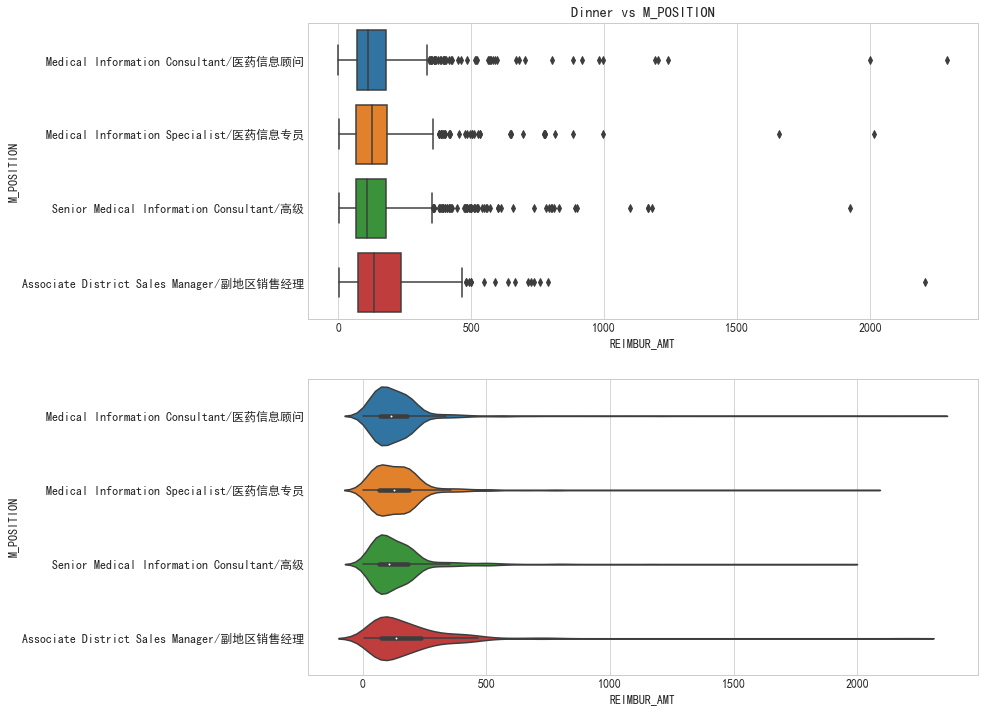

In [29]:
exp_type_plot_bv(exp_type='Dinner', x='REIMBUR_AMT', y='M_POSITION'
              , data=co_df[co_df[['DIVISION','M_POSITION']].apply(lambda x: (x[0],x[1]) in m_position_list, axis=1)]
              , swarm=False)

In [33]:
# co_df[(co_df.LOCATION=='Baotou')&(co_df.EMPLOYEE_NAME.str.contains('Li*'))].head()
co_df[co_df.USERID=='LIQ48']['EXP_TYPE', 'EMPLOYEE_NAME', 'EMPLOYEE_COUNTRY_CODE', 'RPT_NAME',
       'COMPANY_NAME', 'RPT_COUNTRY_CODE', 'COMPANY_CODE', 'RPT_CC_CODE',
       'RPT_LEGACY_KEY', 'FIRST_SUBMITTED_DATE', 'LAST_SUBMITTED_DATE',
       'IS_SENT_BACK', 'PURPOSE', 'SENT_BACK_CODE', 'SENT_BACK_TEXT',
       'APPROVAL_STATUS', 'PAYMENT_DATE', 'TRANSACTION_NO', 'ORG_5_NAME',
       'ORG_5_CODE', 'T_DATE', 'PAYMENT_TYPE', 'VENDOR', 'LOCATION',
       'T_CURRENCY', 'T_AMT', 'RATE', 'REIMBUR_CURRENCY', 'REIMBUR_AMT',
       'CLAIMED_AMT', 'APPROVED_AMT', 'REPORT_DATE', 'E_NAME', 'AD',
       'EMPLOYEE_ID', 'SEX', 'LOCAL_NAME', 'PIN_YIN', 'M_POSITION',
       'EMPLOYMENT_DATE', 'IT_DEPARTMENT', 'COST_CENTER', 'CITY', 'BRANCH',
       'COUNTRY_CODE', 'DIVISION', 'USERID', 'LASTNAME', 'FIRSTNAME',
       'PERSISTANTPERSID', 'LOCALEMPLOYEEID', 'EMPLOYEECATEROGRY',
       'EMP_LOCATION', 'COUNTRYTXT', 'AD_DOMAIN', 'AD_ADMINUNIT', 'LM_USERID',
       'LM_LASTNAME', 'LM_FIRSTNAME', 'LM_PERSISTANTPERSID',
       'LM_LOCALEMPLOYEEID', 'LM_GLOBALCOSTCENTERCD', 'CITY_NAME_EN',
       'CITY_TIER', 'LOCATION_EN']


Index(['EXP_TYPE', 'EMPLOYEE_NAME', 'EMPLOYEE_COUNTRY_CODE', 'RPT_NAME',
       'COMPANY_NAME', 'RPT_COUNTRY_CODE', 'COMPANY_CODE', 'RPT_CC_CODE',
       'RPT_LEGACY_KEY', 'FIRST_SUBMITTED_DATE', 'LAST_SUBMITTED_DATE',
       'IS_SENT_BACK', 'PURPOSE', 'SENT_BACK_CODE', 'SENT_BACK_TEXT',
       'APPROVAL_STATUS', 'PAYMENT_DATE', 'TRANSACTION_NO', 'ORG_5_NAME',
       'ORG_5_CODE', 'T_DATE', 'PAYMENT_TYPE', 'VENDOR', 'LOCATION',
       'T_CURRENCY', 'T_AMT', 'RATE', 'REIMBUR_CURRENCY', 'REIMBUR_AMT',
       'CLAIMED_AMT', 'APPROVED_AMT', 'REPORT_DATE', 'E_NAME', 'AD',
       'EMPLOYEE_ID', 'SEX', 'LOCAL_NAME', 'PIN_YIN', 'M_POSITION',
       'EMPLOYMENT_DATE', 'IT_DEPARTMENT', 'COST_CENTER', 'CITY', 'BRANCH',
       'COUNTRY_CODE', 'DIVISION', 'USERID', 'LASTNAME', 'FIRSTNAME',
       'PERSISTANTPERSID', 'LOCALEMPLOYEEID', 'EMPLOYEECATEROGRY',
       'EMP_LOCATION', 'COUNTRYTXT', 'AD_DOMAIN', 'AD_ADMINUNIT', 'LM_USERID',
       'LM_LASTNAME', 'LM_FIRSTNAME', 'LM_PERSISTANTPERSID',
     

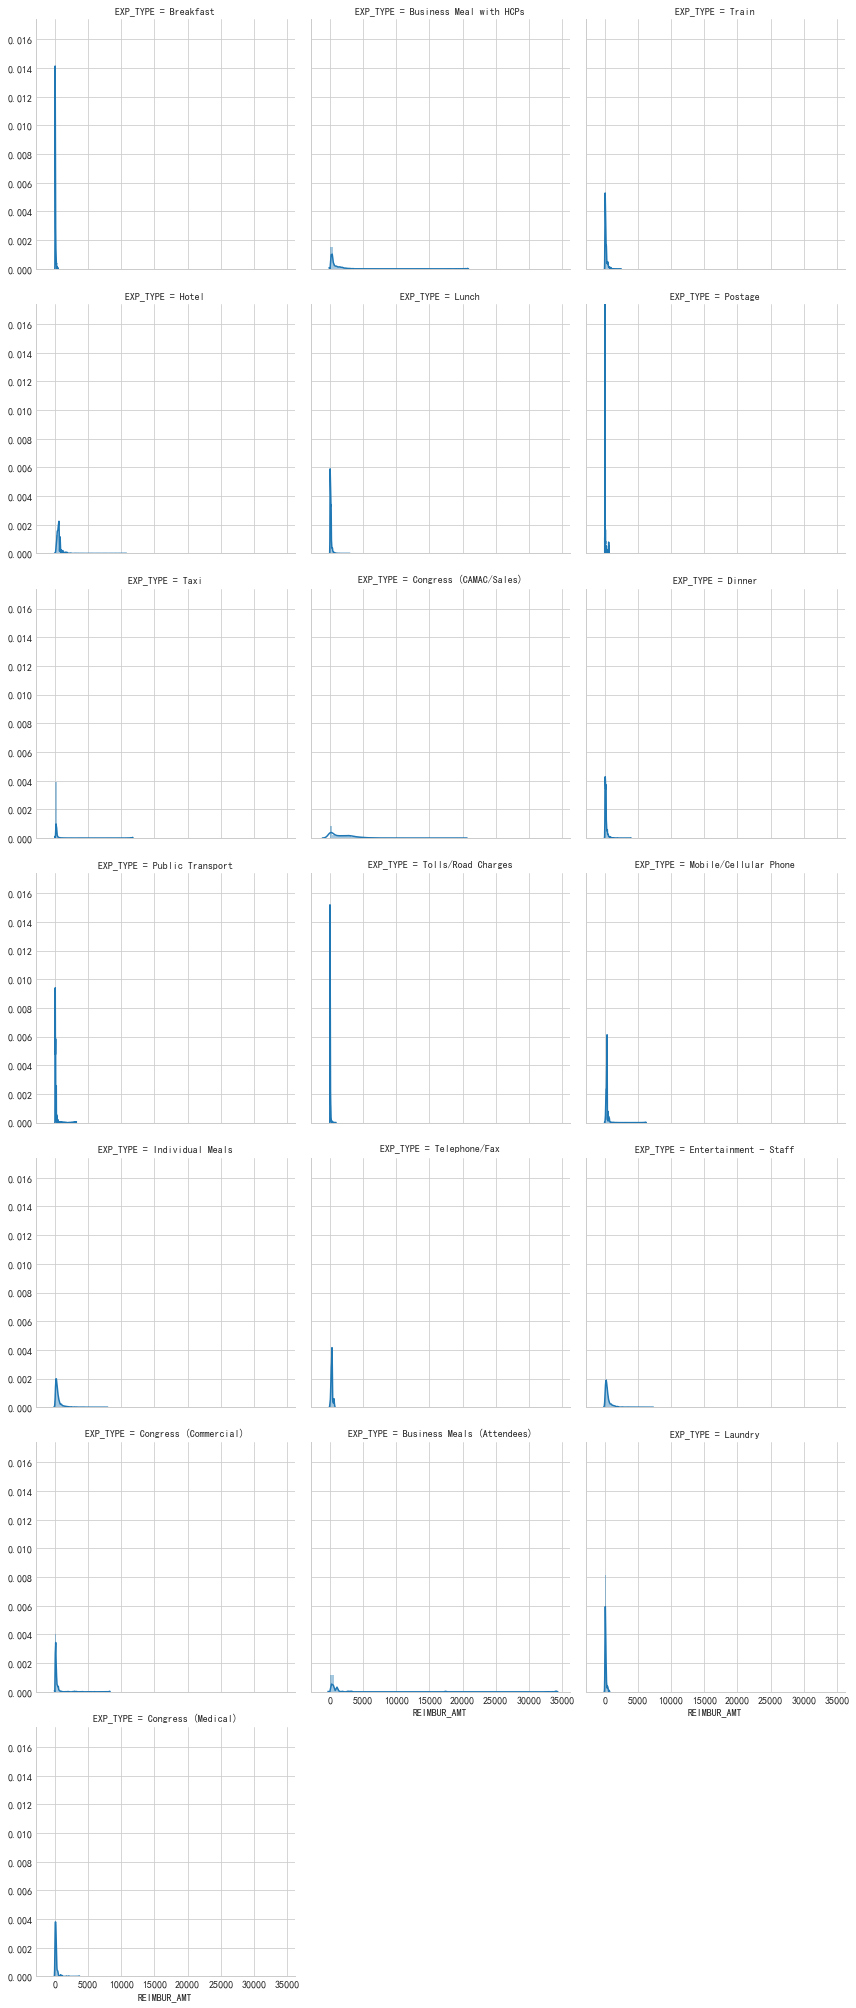

In [100]:
g = sns.FacetGrid(co_df[co_df.EXP_TYPE.isin(exp_type_list)], col='EXP_TYPE', col_wrap=3, size=4)
# g.map(plt.hist, 'T_AMT', bins=4)
g.map(sns.distplot, 'REIMBUR_AMT')


>From the whole company view the >90% transaction is from low area of the whole.
The max value could be normal, due to the ...

Text(0,0.5,'# of Clarm')

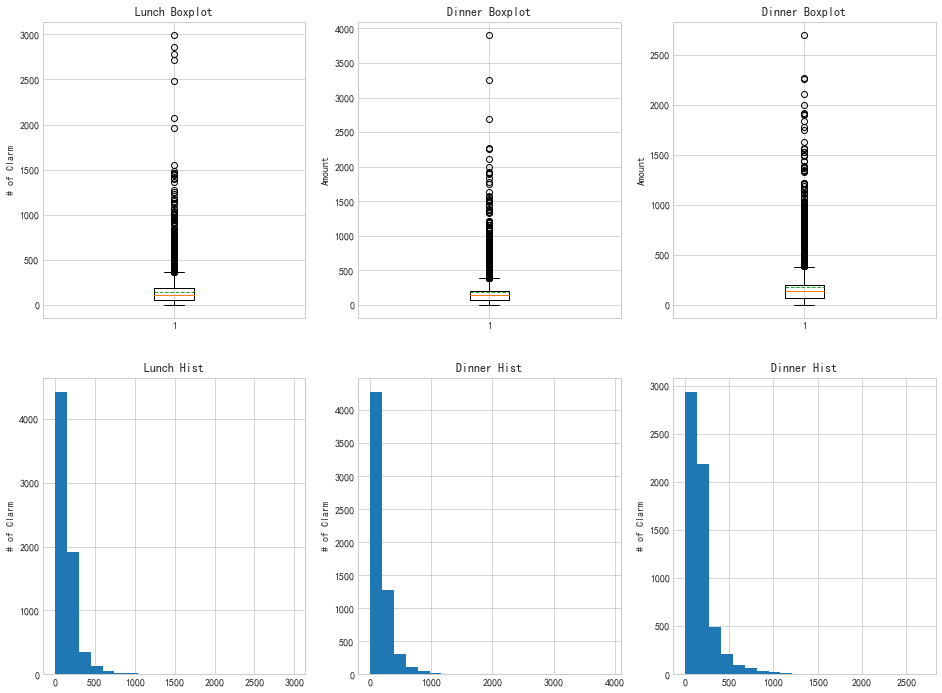

In [101]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(co_df[co_df.EXP_TYPE=='Lunch']['T_AMT'], showmeans = True, meanline = True)
plt.title('Lunch Boxplot')
plt.ylabel('# of Clarm')

plt.subplot(232)
plt.boxplot(co_df[(co_df.EXP_TYPE=='Dinner') & (co_df.T_AMT>=-1000)]['T_AMT'],
            showmeans = True, meanline = True)
plt.title('Dinner Boxplot')
plt.ylabel('Amount')

plt.subplot(234)
plt.hist(co_df[co_df.EXP_TYPE=='Lunch']['T_AMT'], bins=20)
plt.title('Lunch Hist')
plt.ylabel('# of Clarm')

plt.subplot(235)
plt.hist(co_df[(co_df.EXP_TYPE=='Dinner') & (co_df.T_AMT>=-1000)]['T_AMT'], bins=20)
plt.title('Dinner Hist')
plt.ylabel('# of Clarm')

plt.subplot(233)
plt.boxplot(co_df[(co_df.EXP_TYPE=='Dinner') & 
                  (co_df.T_AMT>=-1000) & 
                  (co_df.T_AMT<=3000)]['T_AMT'],
            showmeans = True, meanline = True)
plt.title('Dinner Boxplot')
plt.ylabel('Amount')

plt.subplot(236)
plt.hist(co_df[(co_df.EXP_TYPE=='Dinner') & 
               (co_df.T_AMT>=-1000) & 
               (co_df.T_AMT<=3000)]['T_AMT'], bins=20)
plt.title('Dinner Hist')
plt.ylabel('# of Clarm')



Text(0.5,1,'confidence interval = 99.99')

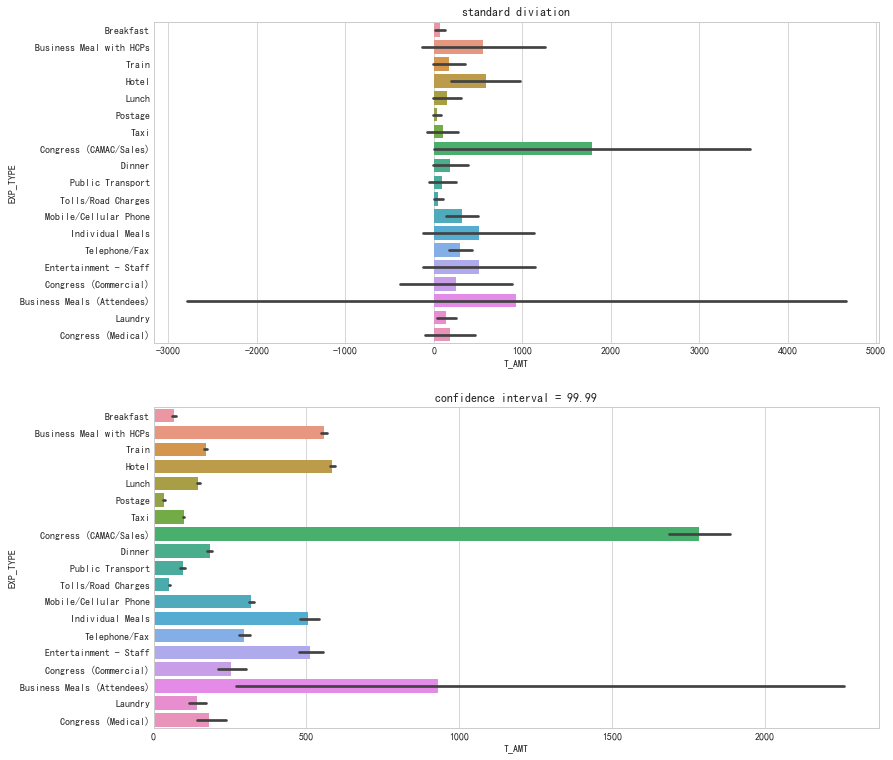

In [106]:
fig, saxis = plt.subplots(2, 1,figsize=(13,13))

ax = sns.barplot(y = 'EXP_TYPE', x = 'T_AMT', data=co_df[co_df.EXP_TYPE.isin(exp_type_list)], ax = saxis[0], ci="sd")
ax.set_title('standard diviation')
ax = sns.barplot(y = 'EXP_TYPE', x = 'T_AMT', data=co_df[co_df.EXP_TYPE.isin(exp_type_list)], ax = saxis[1], ci=99.99)
ax.set_title('confidence interval = 99.99')
# sns.pointplot(y = 'EXP_TYPE', x = 'T_AMT',  data=co_df[co_df.EXP_TYPE.isin(exp_type_list)], ax = saxis[2], ci=99.9999)
# sns.pointplot(y = 'EXP_TYPE', x = 'T_AMT',  data=co_df[co_df.EXP_TYPE.isin(exp_type_list)], ax = saxis[3])


In [107]:
#plot distributions of Age of passengers who survived or did not survive

food_related_df = co_df[(co_df.EXP_TYPE=='Dinner') & 
                              (co_df.T_AMT>=-1000) & 
                              (co_df.T_AMT<=3000)]

food_related_df = food_related_df.append(co_df[(co_df.EXP_TYPE=='Lunch')], ignore_index=True)
food_related_df[['EXP_TYPE','T_AMT']].head()

,EXP_TYPE,T_AMT
0,Dinner,136.0
1,Dinner,261.0
2,Dinner,83.0
3,Dinner,40.0
4,Dinner,274.0


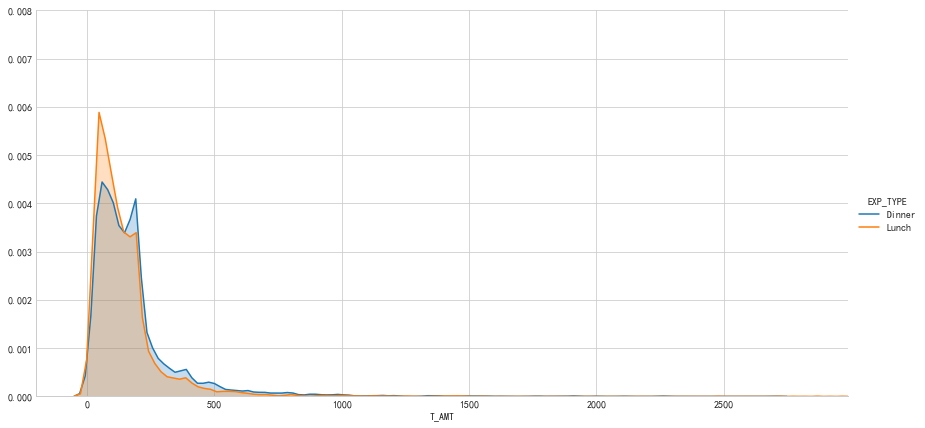

In [108]:
a = sns.FacetGrid( food_related_df, hue = 'EXP_TYPE', aspect=2 , size=6)
a.map(sns.kdeplot, 'T_AMT', shade= True )
# a.set(xlim=(0 , food_related_df['T_AMT'].max()))
a.set(xlim=(-200, food_related_df['T_AMT'].max()), ylim=(0,0.008))
a.add_legend()

In [109]:
# location list
# food_related_df.groupby(by='LOCATION_EN')['T_AMT'].count()
LOCATION_DF = food_related_df[['LOCATION_EN','T_AMT']].groupby(['LOCATION_EN'], as_index=False).count().\
    sort_values(by='T_AMT', ascending=False)
LOCATION_DF.head(20)

,LOCATION_EN,T_AMT
191,SHANGHAI,1540
15,BEIJING,792
55,GUANGZHOU,711
64,HANGZHOU,517
29,CHENGDU,472
245,XIAMEN,278
22,CHANGSHA,272
98,JINAN,271
159,NINGBO,268
153,NANJING,267


In [111]:
#histogram

Result = food_related_df[['LOCATION_EN','T_AMT']].groupby(['LOCATION_EN'], as_index=True).describe()
location_list = Result['T_AMT'][Result['T_AMT']['count']>300].index.tolist()
location_list
# plt.barplot(LOCATION_DF)



['BEIJING', 'CHENGDU', 'GUANGZHOU', 'HANGZHOU', 'SHANGHAI']

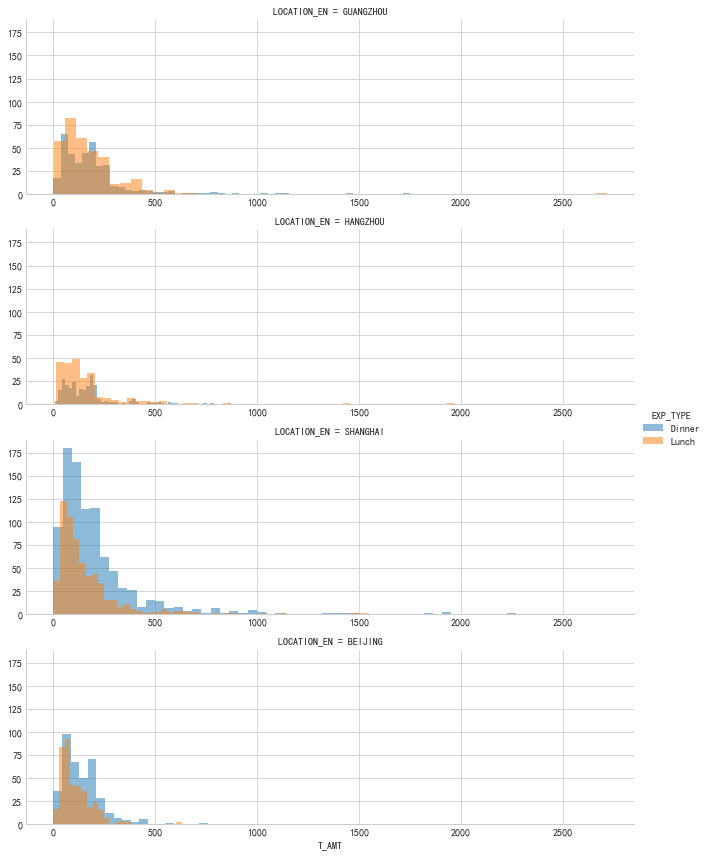

In [113]:
# exp_type_list = ['Dinner','Lunch']
location_list = ['SHANGHAI', 'BEIJING', 'HANGZHOU', 'GUANGZHOU' ]

h = sns.FacetGrid(food_related_df[food_related_df.LOCATION_EN.isin(location_list) &
                                    food_related_df.EXP_TYPE.isin(exp_type_list)],
                  row='LOCATION_EN',
                  # col='EXP_TYPE', 
                  hue='EXP_TYPE', size=3, aspect=3)
h.map(plt.hist, 'T_AMT', bins=50, alpha = .5)
h.add_legend()

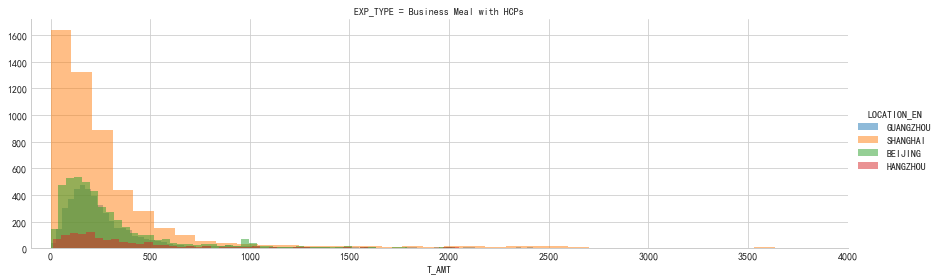

In [115]:
"""
['Breakfast',
 'Business Meal with HCPs',
 'Business Meals (Attendees)',
 'Congress (CAMAC/Sales)',
 'Congress (Commercial)',
 'Congress (Medical)',
 'Dinner',
 'Entertainment - Staff',
 'Hotel',
 'Individual Meals',
 'Laundry',
 'Lunch',
 'Mobile/Cellular Phone',
 'Postage',
 'Public Transport',
 'Taxi',
 'Telephone/Fax',
 'Tolls/Road Charges',
 'Train']
"""

exp_type_list = ["Business Meal with HCPs"]
location_list = ['SHANGHAI', 'BEIJING', 'HANGZHOU', 'GUANGZHOU' ]

h = sns.FacetGrid(co_df[co_df.LOCATION_EN.isin(location_list) &
                                    co_df.EXP_TYPE.isin(exp_type_list)],
                  row='EXP_TYPE',
                  # col='EXP_TYPE', 
                  hue='LOCATION_EN', size=4, aspect=3)
# h.map(sns.kdeplot, 'T_AMT', shade= True)
h.map(plt.hist, 'T_AMT', bins=200, alpha = .5)
h.set(xlim=(-100, 4000)
#       , ylim=(0,1000)
     )
h.add_legend()

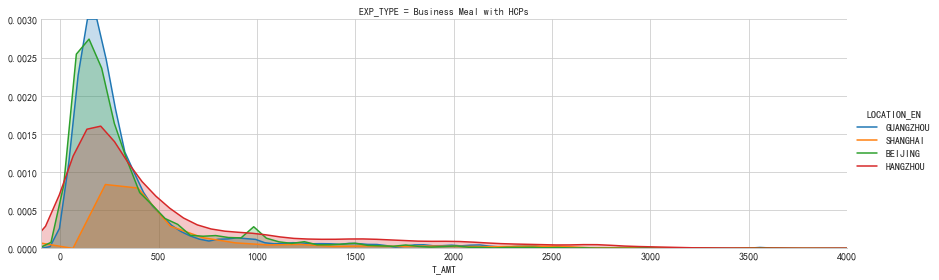

In [116]:
h = sns.FacetGrid(co_df[co_df.LOCATION_EN.isin(location_list) &
                                    co_df.EXP_TYPE.isin(exp_type_list)],
                  row='EXP_TYPE',
                  # col='EXP_TYPE', 
                  hue='LOCATION_EN', size=4, aspect=3)
h.map(sns.kdeplot, 'T_AMT', shade= True)
# h.map(plt.hist, 'T_AMT', bins=200, alpha = .5)
h.set(xlim=(-100, 4000), ylim=(0,0.003)
     )
h.add_legend()

# The End

In [135]:
# Close the oracle db connection
connection.close()